<a href="https://colab.research.google.com/github/rashwinr/MONAI_tutorials/blob/main/MONAI_Model_Zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MONAI Model Zoo
<center><img src="https://monai.io/assets/img/community_header.png"/></center>

MONAI Model Zoo hosts a collection of medical imaging models in the MONAI Bundle format.

The [MONAI Bundle](https://docs.monai.io/en/latest/bundle_intro.html) format defines portable describes of deep learning models.

A bundle includes:
 - The essential files necessary during a model development life cycle and allows users and programs to understand the purpose and usage of the model




## MONAI Bundle

MONAI Bundles are a standardized file structure for distributing trained MONAI models
```
ModelName
┣━ LICENSE
┣━ configs
┃  ┗━ metadata.json
┣━ models
┃  ┣━ model.pt
┃  ┣━ *model.ts
┃  ┗━ *model.onnx
┗━ docs
   ┣━ *README.md
   ┗━ *license.txt
```
The following files are required with the given filenames within the bundle directory:

- **LICENSE**: A license for the software itself (including the configuration files and model weights).

- **metadata.json**: Metadata information in JSON format including:
  - the type of model
  - definition of input and output tensors
  - versions of the model and used software

- **model.pt**: the state dictionary of a saved model, the information to instantiate the model must be found in the metadata file.





# Available Models
- **Breast Density Classification**
- **BraTS MRI Segmentation**
- **Wholebody** CT Segmentation
- **Whole brain** UNEST Segmentation



      - BraTS MRI Generative Diffusion
      - Endoscopic Inbody Classification
      - Endoscopic Tool Segmentation
      - Lung Nodule CT Detection
      - Prostate MRI Anatomy
      - Renalstructures CT Segmentation
      - Spleen CT Segmentation
      - Spleen Annotation
      - Swin UNETr BTCV Segmentation
      - Valve landmarks
      - Ventricular Short Axis 3Label



### MONAI

In [ ]:
!pip show monai

In [ ]:
!pip install monai[all]

In [ ]:
from monai.utils import set_determinism, first
from monai.config import print_config
print_config()
set_determinism(42)


## Working directory

In [ ]:
import os
print(os.getcwd())

# Breast Density Classification

A pre-trained model for classifying breast images (mammograms)

Based on the paper: [A multi-reconstruction study of breast density estimation using Deep Learning](https://arxiv.org/pdf/2202.08238) from **Center for Augmented Intelligence in Imaging, Mayo Clinic Florida**

- Accurate breast density estimation in mammograms is crucial for breast cancer risk assessment, but it is challenging due to low contrast and variations in fatty tissue.
- This study shows that a neural network trained on all mammogram acquisitions  outperforms networks trained on a single acquisition, improving the accuracy of automated breast density classification.
- **Model**: InceptionV3
- **Image size**: ``[299,299,3]``
- Accepted imaging modalities include:
  - **full-field 2D digital mammograms**: are the standard two-dimensional X-ray images of the entire breast used for breast cancer screening
  - **tomosynthesis**: A three-dimensional imaging technique that acquires multiple images of the breast from different angles
  - **Hologic's Intelligent 2D**: A two-dimensional image synthesized from a tomosynthesis dataset, designed to enhance image clarity


**Breast Imaging & Reporting & Data System (BI-RADS)** have standardized the breast density on these mammograms is categorized into four levels:
- **A** -- Almost entirely fat
- **B** -- Scattered fibroglandular density
- **C** -- Heterogeneously dense
- **D** -- Extremely dense





## Importing Model

- Syntax: ``monai.bundle.download``

In [ ]:
import monai

monai.bundle.download(name="breast_density_classification", bundle_dir="/content/")

## Exploring Model-Zoo package

Syntax: ``for root, dirs, files in os.walk(model_path):``


In [ ]:
import os

folder_path = "/content/"

for item in os.listdir(folder_path):
  if item == "breast_density_classification":
    print(f"Found folder: {item}")
    model_path = os.path.join(folder_path, item)
    for root, dirs, files in os.walk(model_path):
      for dir_name in dirs:
        print(f"  - Directory: {dir_name}")
      for file_name in files:
        print(f"  - File: {file_name}")



## Visualizing the images

In [ ]:
# prompt: help me visualize the images in sample_data with separate figure for class A, B, C, and D. Plot all the images inside the folders

import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your sample data directory
sample_data_dir = "/content/breast_density_classification/sample_data"

# Create a dictionary to store images for each class
images_by_class = {"A": [], "B": [], "C": [], "D": []}

# Iterate through the subfolders (classes A, B, C, D)
for class_folder in os.listdir(sample_data_dir):
  class_path = os.path.join(sample_data_dir, class_folder)
  if os.path.isdir(class_path):
    # Iterate through the images in the current class folder
    for image_file in os.listdir(class_path):
      image_path = os.path.join(class_path, image_file)
      if image_file.endswith(".png") or image_file.endswith(".jpg"):
        images_by_class[class_folder].append(image_path)


# Plot the images for each class in a separate figure
for class_name, image_paths in images_by_class.items():
  plt.figure(figsize=(15, 10))  # Adjust figure size as needed
  plt.suptitle(f"Class {class_name} Images")

  for i, image_path in enumerate(image_paths):
    img = Image.open(image_path)
    plt.subplot(len(image_paths) // 4 + 1, 4, i + 1)  # Adjust subplot grid as needed
    plt.imshow(img, cmap='gray')  # Adjust cmap as needed
    plt.axis('off')

  plt.tight_layout()
  plt.show()


## Auxillary codes

Syntax: ``os.chdir`` command in Python changes the current working directory

Other syntaxes followed from [Model Zoo Webpage](https://monai.io/model-zoo.html) and information under **Breast density classification**

In [ ]:
os.chdir("/content/breast_density_classification")

In [ ]:
!python "/content/breast_density_classification/scripts/create_dataset.py" -base_dir "/content/breast_density_classification/sample_data" -output_file "/content/breast_density_classification/configs/sample_image_data.json"

In [ ]:
import os
os.environ['PYTHONPATH'] += ":/content/breast_density_classification/scripts"

In [ ]:
!python -m monai.bundle run evaluating \
  --bundle_root "/content/breast_density_classification/" \
  --meta_file "configs/metadata.json" \
  --config_file "configs/inference.json" "configs/logging.conf"

## Interpreting the results

In [ ]:
import pandas as pd


# Load the predictions from the CSV file
predictions_df = pd.read_csv('/content/breast_density_classification/output/predictions.csv',header=None, names=['file','Prob_A','Prob_B','Prob_C','Prob_D'])

print(predictions_df.head())

### Creating Labels or ground truth

In [ ]:
# Create the 'Label' column
import numpy as np
label_values = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]
predictions_df['Label'] = label_values
predictions_df['Prediction'] = np.argmax(predictions_df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values.tolist(),axis=1)
print(predictions_df.head())

In [ ]:
from sklearn.metrics import accuracy_score

# Extract true labels and predicted probabilities
true_labels = predictions_df['Label'].tolist()
predictions = predictions_df['Prediction'].tolist()
print(predictions)
print(true_labels)

#Computing the accuracy
accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['A', 'B', 'C', 'D'], yticklabels=['A', 'B', 'C', 'D'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Clearing data

In [ ]:
import shutil
import os

folder_path = "/content/"

if os.path.exists("/content/breast_density_classification"):
  shutil.rmtree("/content/breast_density_classification")
  print("breast_density_classification folder and its contents have been deleted.")
else:
  print("breast_density_classification folder does not exist.")

# Brain Tumor Segmentation

A pre-trained model for volumetric (3D) segmentation of brain tumor subregions from multimodal MRIs based on BraTS 2018 data

This work is based on [3D MRI brain tumor segmentation using autoencoder regularization](https://arxiv.org/pdf/1810.11654) by NVidia that won the BraTS 2018 challenge.

The model is trained to segment nested subregions of primary brain tumors (gliomas) based on 4 aligned input MRI scans (T1c, T1, T2, FLAIR).

## BraTS 2018 Dataset

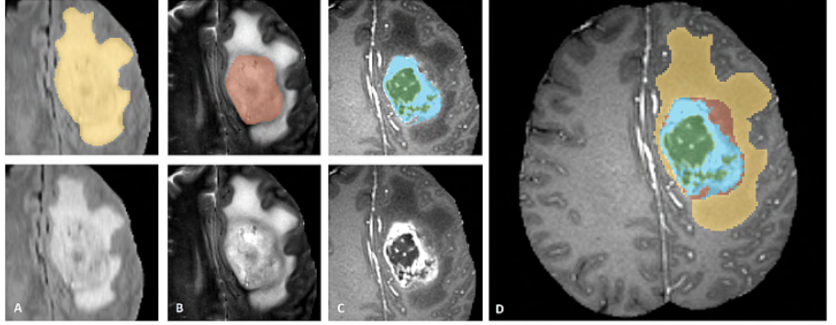

**Glioma sub-regions** Tumor sub-regions are annotated in the different modalities (top left) and the final labels for the whole dataset (right).

- **From left to right**:
 - **the whole tumor** (yellow) visible in T2-FLAIR (Fig.A), the tumor core (red) visible in T2 (Fig.B),
 - **the enhancing tumor** (light blue) visible in T1Gd, surrounding the cystic/**necrotic core** (green) (Fig. C).

The segmentations are combined to generate the final labels of the tumor sub-regions (Fig.D): edema (yellow), non-enhancing solid core (red), necrotic/cystic core (green), enhancing core (blue)

## Objectives

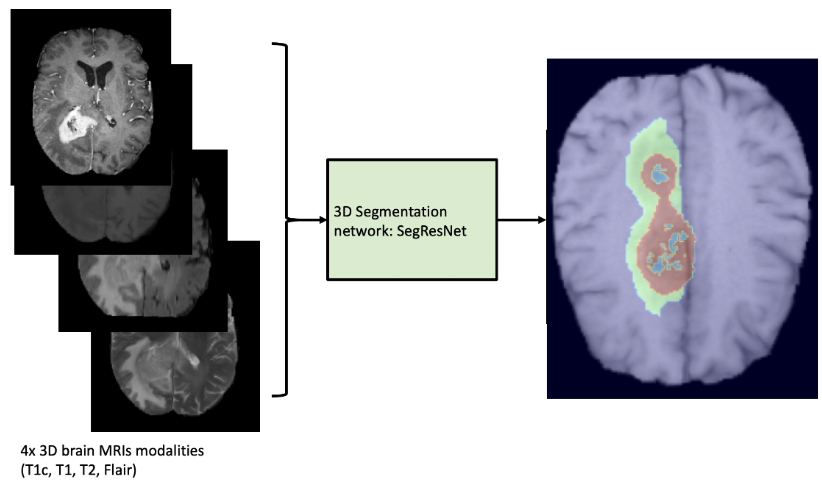

**Input**:
- 4 channel aligned MRIs  (T1c - T1 - T2 - FLAIR)
- $224 \times 224 \times 144$

**Output**:
- Label 0: Background/Healthy tissue
- Label 1: Tumor core
- Label 2: Whole tumor
- Label 3: Edema
- Label 4: Enhancing Tumor sub-region

## Importing data

In [ ]:
os.chdir("/content/")
!pip install gdown

In [ ]:
import gdown

# File ID from Google Drive link https://drive.google.com/file/d/1rXcYs6l08HRaO-DSyahy1SwYwXkDUty0/view?usp=drive_link
file_id = '1rXcYs6l08HRaO-DSyahy1SwYwXkDUty0'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'MICCAI_BraTS_2018_Data_Training.zip'

# Download the file
gdown.download(url, output, quiet=False)

# Check if the file is a valid zip file
!file MICCAI_BraTS_2018_Data_Training.zip

# Unzip the file to the specified directory, automatically overwriting files
!unzip -o MICCAI_BraTS_2018_Data_Training.zip -d /content/MICCAI_BraTS_2018_Data_Training

# List the contents of the directory to verify extraction
# !ls -l /content/MICCAI_BraTS_2018_Data_Training

## Importing Model

In [ ]:
monai.bundle.download(name="brats_mri_segmentation", bundle_dir="/content/")

## Creating datalist

Note: ``python scripts/prepare_datalist.py --path your-brats18-dataset-path`` given in [Model Zoo](https://monai.io/model-zoo.html) will work only if the dataset size is above 200 entries.

In [ ]:
import argparse
import glob
import json
import os
from sklearn.model_selection import train_test_split

# ---  Configuration ---
data_dir = "/content/MICCAI_BraTS_2018_Data_Training/MICCAI_BraTS_2018_Data_Training/"  # Set your data directory here

# --- Data Processing ---
samples = sorted(glob.glob(os.path.join(data_dir, "*", "*"), recursive=True))
# print(samples)
datalist = []

for line in samples:
    names = os.listdir(line)
    # print(names)
    seg, t1ce, t1, t2, flair = [], [], [], [], []
    for name in names:
        name = os.path.join(line, name)
        # print(name)
        if "_seg.nii" in name:
            seg.append(name)
            # print("reached seg\n")
        elif "_t1ce.nii" in name:
            t1ce.append(name)
        elif "_t1.nii" in name:
            t1.append(name)
        elif "_t2.nii" in name:
            t2.append(name)
        elif "_flair.nii" in name:
            flair.append(name)
    if seg:
        datalist.append({"label": seg[0], "image": t1ce + t1 + t2 + flair})

# --- Dataset Splitting ---
# print(datalist)
train_list, other_list = train_test_split(datalist, train_size=0.9, test_size=0.1)
val_list, test_list = train_test_split(other_list, test_size=0.1, train_size=0.9)
datalist = {"training": train_list, "validation": val_list, "testing": test_list}
print(datalist)

# --- Save the Data List ---
with open("/content/brats_mri_segmentation/configs/datalist.json", "w") as f:
    json.dump(datalist, f)

## Model Inference

In [ ]:
!python -m monai.bundle run \
  --config_file /content/brats_mri_segmentation/configs/inference.json \
  --dataset_dir "/content/MICCAI_BraTS_2018_Data_Training/" \
  --bundle_root "/content/brats_mri_segmentation/" \
  --device "cpu"

If the code doesn't work then please goto the inference.json file at /content/brats_mri_segmentation/configs/inference.json and add a line in checkpointloader

```"map_location": "cpu",```

## Outputs

### Locating them

The files are saved in the folder called eval generated inside "/content/brats_mri_segmentation/eval"

In [ ]:
import os
import glob

eval_folder = "/content/brats_mri_segmentation/eval"

# Use glob to recursively find all folders within the eval folder
folders = glob.glob(os.path.join(eval_folder, '***'), recursive=True)

# Filter the list to include only directories
folders = [f for f in folders if os.path.isdir(f)]

# Print the list of folders for verification (optional)
print(folders)

# Example: Save the name of the first found folder to a variable
if folders:
  first_folder = os.path.basename(folders[0])
  print("First folder name:", first_folder)
else:
  print("No folders found in the specified path.")

if first_folder:
  new_folder_name = first_folder.replace("_t1ce", "")
  search_path = os.path.join("/content/MICCAI_BraTS_2018_Data_Training/MICCAI_BraTS_2018_Data_Training", "**", new_folder_name)
  found_folders = glob.glob(search_path, recursive=True) # This line is added to define found_folders
  if found_folders:
      print("Found folder:", found_folders[0])
  else:
      print("Folder not found:", new_folder_name)
else:
  print("first_folder variable is not defined.")

### Visualization

In [ ]:
from monai.transforms import LoadImage
from monai.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import os
import nibabel as nib

if found_folders:
  found_folder_path = found_folders[0]

  t1_file = os.path.join(found_folder_path, f"{new_folder_name}_t1.nii.gz")
  seg_file = os.path.join(found_folder_path, f"{new_folder_name}_seg.nii.gz")

  if os.path.exists(t1_file) and os.path.exists(seg_file):

    loader = LoadImage(image_only=True)

    t1_image = loader(t1_file)
    seg_image = loader(seg_file)


    plt.figure(figsize=(12, 6))
    plt.imshow(t1_image[:, :, t1_image.shape[2] // 2], cmap="gray")
    plt.imshow(seg_image[:, :, seg_image.shape[2] // 2], cmap="jet",alpha=0.3)
    plt.title("Segmentation original")
    plt.show()


    if folders:
      first_folder_path = folders[0]

      t1_file_found = os.path.join(found_folder_path, f"{new_folder_name}_t1.nii.gz")
      seg_file_first = os.path.join(first_folder_path, f"{first_folder}_seg.nii.gz")

      if os.path.exists(t1_file_found) and os.path.exists(seg_file_first):

        loader = LoadImage(image_only=True)

        t1_image_found = loader(t1_file_found)
        seg_image_first = loader(seg_file_first)


        plt.figure(figsize=(12, 6))
        plt.imshow(t1_image_found[:, :, t1_image_found.shape[2] // 2], cmap="gray")
        plt.imshow(seg_image_first[:, :, seg_image_first.shape[2] // 2], cmap="jet",alpha=0.3)
        plt.title("Segmentation generated")
        plt.show()
      else:
        print(f"T1 or seg file not found in paths: {t1_file_found}, {seg_file_first}")
    else:
      print("No folders found to compare with")
  else:
    print(f"T1 or seg file not found in paths: {t1_file}, {seg_file}")
else:
  print("No folders found.")



### Visualization slicewise

In [ ]:
from monai.transforms import LoadImage
import matplotlib.pyplot as plt
import os

if found_folders:
  found_folder_path = found_folders[0]

  t1_file = os.path.join(found_folder_path, f"{new_folder_name}_t1.nii.gz")
  seg_file = os.path.join(first_folder_path, f"{first_folder}_seg.nii.gz")


  if os.path.exists(t1_file) and os.path.exists(seg_file):
    loader = LoadImage(image_only=True)
    orig_load = loader(t1_file)
    recon_load = loader(seg_file)


    plt.figure(figsize=(10, 8))
    for i in range(9):
      plt.subplot(3, 3, i+1)
      plt.imshow(orig_load[:, :, 10+(i+1)*10], cmap='gray')
      plt.imshow(recon_load[:, :, 10+(i+1)*10], cmap='jet', alpha=0.6)
    plt.show()
  else:
    print(f"T1 or seg file not found in paths: {t1_file}, {seg_file}")
else:
  print("No folders found.")


## Voxelwise counting

In [ ]:
import nibabel as nib
import numpy as np

if found_folders:
  found_folder_path = found_folders[0]
  seg_file_original = os.path.join(found_folder_path, f"{new_folder_name}_seg.nii.gz")
  seg_file_generated = os.path.join(first_folder_path, f"{first_folder}_seg.nii.gz")

  if os.path.exists(seg_file_original) and os.path.exists(seg_file_generated):
    loader = LoadImage(image_only=True)
    orig_seg_load = loader(seg_file_original)
    recon_seg_load = loader(seg_file_generated)

    print("Label segment details for original segmentation:")
    min_val = np.min(orig_seg_load)
    max_val = np.max(orig_seg_load)
    print("Shape of seg_image:", orig_seg_load.shape)
    print("Minimum Voxel value:", min_val)
    print("Maximum Voxel value:", max_val)

    for label_val in np.unique(orig_seg_load):
      count = np.sum(orig_seg_load == label_val)
      print(f"Label {label_val}: {count} voxels")

    print("\nLabel segment details for generated segmentation:")
    min_val = np.min(recon_seg_load)
    max_val = np.max(recon_seg_load)
    print("Shape of seg_image:", recon_seg_load.shape)
    print("Minimum Voxel value:", min_val)
    print("Maximum Voxel value:", max_val)

    for label_val in np.unique(recon_seg_load):
      count = np.sum(recon_seg_load == label_val)
      print(f"Label {label_val}: {count} voxels")

  else:
    print(f"Segmentation files not found in paths: {seg_file_original}, {seg_file_generated}")
else:
  print("No folders found.")


**Output**:
- Label 0: Background/Healthy tissue
- Label 1: Tumor core
- Label 2: Whole tumor
- Label 3: Edema
- Label 4: Enhancing Tumor sub-region

In [ ]:
if found_folders:
  found_folder_path = found_folders[0]
  seg_file_original = os.path.join(found_folder_path, f"{new_folder_name}_seg.nii.gz")
  seg_file_generated = os.path.join(first_folder_path, f"{first_folder}_seg.nii.gz")

  if os.path.exists(seg_file_original) and os.path.exists(seg_file_generated):
    loader = LoadImage(image_only=True)
    orig_seg_load = loader(seg_file_original)
    recon_seg_load = loader(seg_file_generated)

    orig_counts = {}
    for label_val in np.unique(orig_seg_load):
      if label_val != 0:
        count = np.sum(orig_seg_load == label_val)
        orig_counts[label_val] = count

    recon_counts = {}
    for label_val in np.unique(recon_seg_load):
      if label_val != 0:
        count = np.sum(recon_seg_load == label_val)
        recon_counts[label_val] = count

    labels = sorted(set(list(orig_counts.keys()) + list(recon_counts.keys())))
    orig_values = [orig_counts.get(label, 0) for label in labels]
    recon_values = [recon_counts.get(label, 0) for label in labels]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, orig_values, width, label='Original')
    rects2 = ax.bar(x + width/2, recon_values, width, label='Generated')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Voxel Count')
    ax.set_title('Voxel-wise Label Counts')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()


  else:
    print(f"Segmentation files not found in paths: {seg_file_original}, {seg_file_generated}")
else:
  print("No folders found.")
